# Grid Search

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Simple Grid Search

In [2]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print(f"Size of training set: {X_train.shape[0]} size of test set: {X_test.shape[0]}")

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print(f"Best score: {best_score:.2f}")
print(f"Best parameters: {best_parameters}")

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


## The Danger of Overfitting the Parameters and the Validation Set

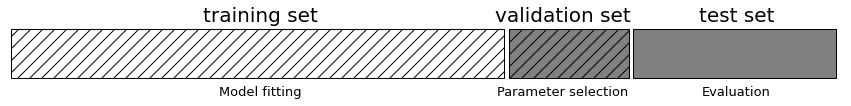

In [3]:
from helpers.plot_cross_validation import plot_threefold_split

plot_threefold_split()

In [4]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print(f"Size of training set: {X_train.shape[0]} size of validation set: {X_valid.shape[0]} size of test set: {X_test.shape[0]}\n")

Size of training set: 84 size of validation set: 28 size of test set: 38



In [5]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [6]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(f"Best score on validation set: {best_score:.2f}")
print(f"Best parameters: {best_parameters}")
print(f"Test set score with best parameters: {test_score:.2f}")

Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

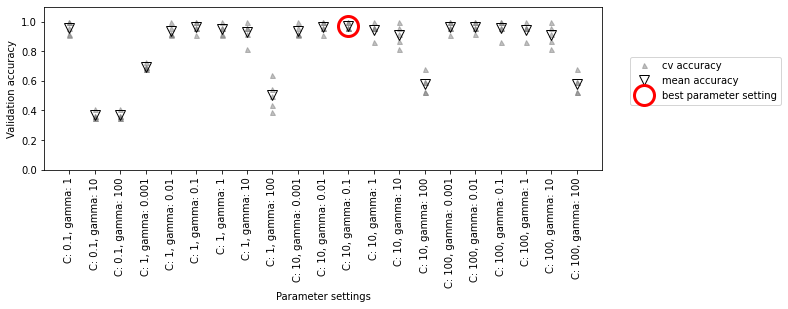

In [8]:
from helpers.plot_grid_search import plot_cross_val_selection

plot_cross_val_selection()
plt.show()

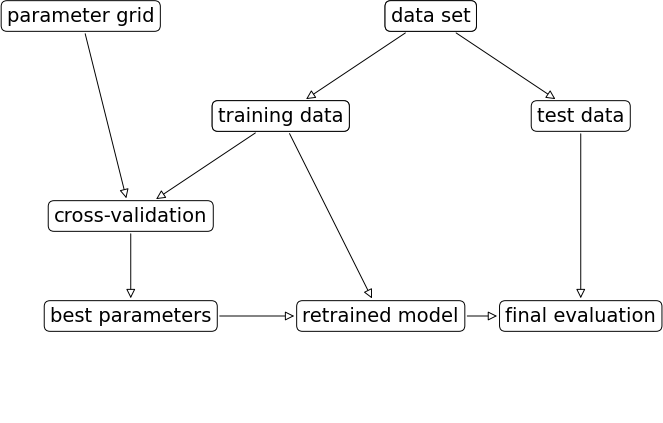

In [9]:
from helpers.plot_grid_search import plot_grid_search_overview

plot_grid_search_overview()

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print(f"Parameter grid:\n{param_grid}")

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [14]:
print(f"Test set score: {grid_search.score(X_test, y_test):.2f}")

Test set score: 0.97


In [15]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [16]:
print(f"Best estimator:\n{grid_search.best_estimator_}")

Best estimator:
SVC(C=10, gamma=0.1)


### Analyzing the result of cross-validation

In [17]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# show the first 5 rows
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001477,0.000192,0.000614,0.000042,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001322,0.000012,0.000601,0.000043,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001433,0.000096,0.000700,0.000151,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001357,0.000015,0.000606,0.000031,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001816,0.000288,0.000705,0.000150,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
5,0.002090,0.000283,0.000752,0.000091,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
6,0.001319,0.000020,0.000606,0.000023,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
7,0.001364,0.000050,0.000612,0.000019,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
8,0.001352,0.000038,0.000608,0.000034,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
9,0.001333,0.000041,0.000624,0.000036,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [19]:
scores = np.array(results["mean_test_score"]).reshape(6, 6)

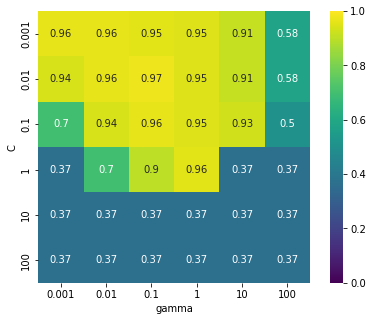

In [20]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(scores[::-1], vmin=0, vmax=1, cmap="viridis", square=True, annot=True)

# axis labels
plt.xlabel('gamma')
plt.ylabel('C')

# xticks
xticks_labels = param_grid['gamma']
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)

# y ticks
yticks_labels = param_grid['C']
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)

plt.show()

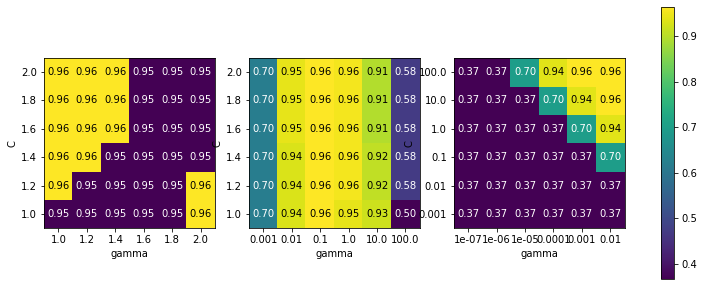

In [21]:
from helpers.tools import heatmap as heatmap_tools

fig, axes = plt.subplots(1, 3, figsize=(13, 5)) 

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}


for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = heatmap_tools(scores, xlabel='gamma', 
                                               ylabel='C', xticklabels=param_grid['gamma'], 
                                               yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

### Search over spaces that are not grids

In [22]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [23]:
param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [24]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [25]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001618,0.001305,0.001336,0.001311,0.001563,0.001865,0.001305,0.001294,0.001308,0.001399,...,0.000809,0.001001,0.001793,0.002192,0.001175,0.00107,0.000923,0.00084,0.000852,0.000858
std_fit_time,0.000497,0.000029,0.000051,0.000025,0.000074,0.000045,0.000032,0.000027,0.000026,0.000129,...,0.000017,0.000029,0.000033,0.000053,0.000044,0.000034,0.000051,0.000015,0.00003,0.00004
mean_score_time,0.000649,0.000594,0.00059,0.00059,0.00058,0.000659,0.000585,0.000601,0.000589,0.000583,...,0.000467,0.000511,0.000565,0.000656,0.000499,0.000487,0.000466,0.000479,0.000452,0.000458
std_score_time,0.00011,0.000033,0.000018,0.000027,0.000008,0.000004,0.000023,0.00006,0.000025,0.000016,...,0.00001,0.000035,0.000028,0.000003,0.000009,0.000002,0.000004,0.000037,0.000012,0.000027
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


### Using different cross-validation strategies with grid search

### Nested cross-validation

In [26]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


### Parallelizing cross-validation and grid search